In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import sklearn

In [2]:
!cp -r /kaggle/input/imageclassificationsport/ /kaggle/working

In [3]:
import tarfile
my_tar = tarfile.open('/kaggle/working/imageclassificationsport/data-z3.tar.xz')
my_tar.extractall('/kaggle/working/imageclassificationsport/data/') # specify which folder to extract to
my_tar.close()

In [4]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/working'):
    for filename in filenames:
        os.path.join(dirname, filename)

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [5]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from os.path import basename
import glob
import os


Analyzujete početnosti v triedach, zobrazte si reprezentanta z triedy

In [6]:
class_name = {}

for filepath in glob.iglob('/kaggle/working/imageclassificationsport/data/train/*'):
    filename = basename(filepath)
    count = 0
    for path in os.listdir(filepath):
        # check if current path is a file
        if os.path.isfile(os.path.join(filepath, path)):
            count += 1
    class_name[filename] = [count]


In [7]:
class_names = list(class_name.keys())

In [8]:
import pandas as pd
count_df = pd.DataFrame(class_name).transpose()

In [9]:
count_df.columns = ['amount']

count_df.head()

,amount
croquet,136
rugby,166
fencing,135
tug of war,128
hurdles,137


In [10]:
import plotly.express as px

fig = px.bar(count_df, x="amount",title="Amount of classes",template="plotly_dark", height=500)
fig.show()

Analyzujte triedy podľa farebnosti pixelov obrázkov

In [11]:
from collections import Counter
from sklearn.cluster import KMeans
from matplotlib import colors
import matplotlib.pyplot as plt
import numpy as np
import cv2

In [12]:
def prep_image(raw_img):
    modified_img = cv2.resize(raw_img, (900, 600), interpolation = cv2.INTER_AREA)
    modified_img = modified_img.reshape(modified_img.shape[0]*modified_img.shape[1], 3)
    return modified_img

In [13]:
def rgb_to_hex(rgb_color):
    hex_color = "#"
    for i in rgb_color:
        i = int(i)
        hex_color += ("{:02x}".format(i))
    return hex_color

In [14]:
def color_analysis(img):
    clf = KMeans(n_clusters = 5)
    color_labels = clf.fit_predict(img)
    center_colors = clf.cluster_centers_
    counts = Counter(color_labels)
    ordered_colors = [center_colors[i] for i in counts.keys()]
    hex_colors = [rgb_to_hex(ordered_colors[i]) for i in counts.keys()]
    plt.figure(figsize = (1, 1))
    plt.pie(counts.values(), labels = hex_colors, colors = hex_colors)
    plt.savefig("color_analysis_report.png")
    print(hex_colors)

['#eef8f9', '#838a66', '#a9b2b0', '#6c7550', '#323e2c']


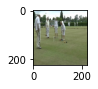

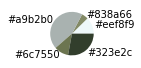

In [15]:
from matplotlib.pyplot import figure
plt.figure(figsize=(1,1))

for dirpath in glob.iglob('/kaggle/working/imageclassificationsport/data/train/*'):
    count = 0
    for imagepath in glob.iglob(dirpath+'/*'):
        filename = basename(imagepath)
        image = cv2.imread(imagepath)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        plt.imshow(image)
        modified_image = prep_image(image)
        color_analysis(modified_image)
        break
    break  
            

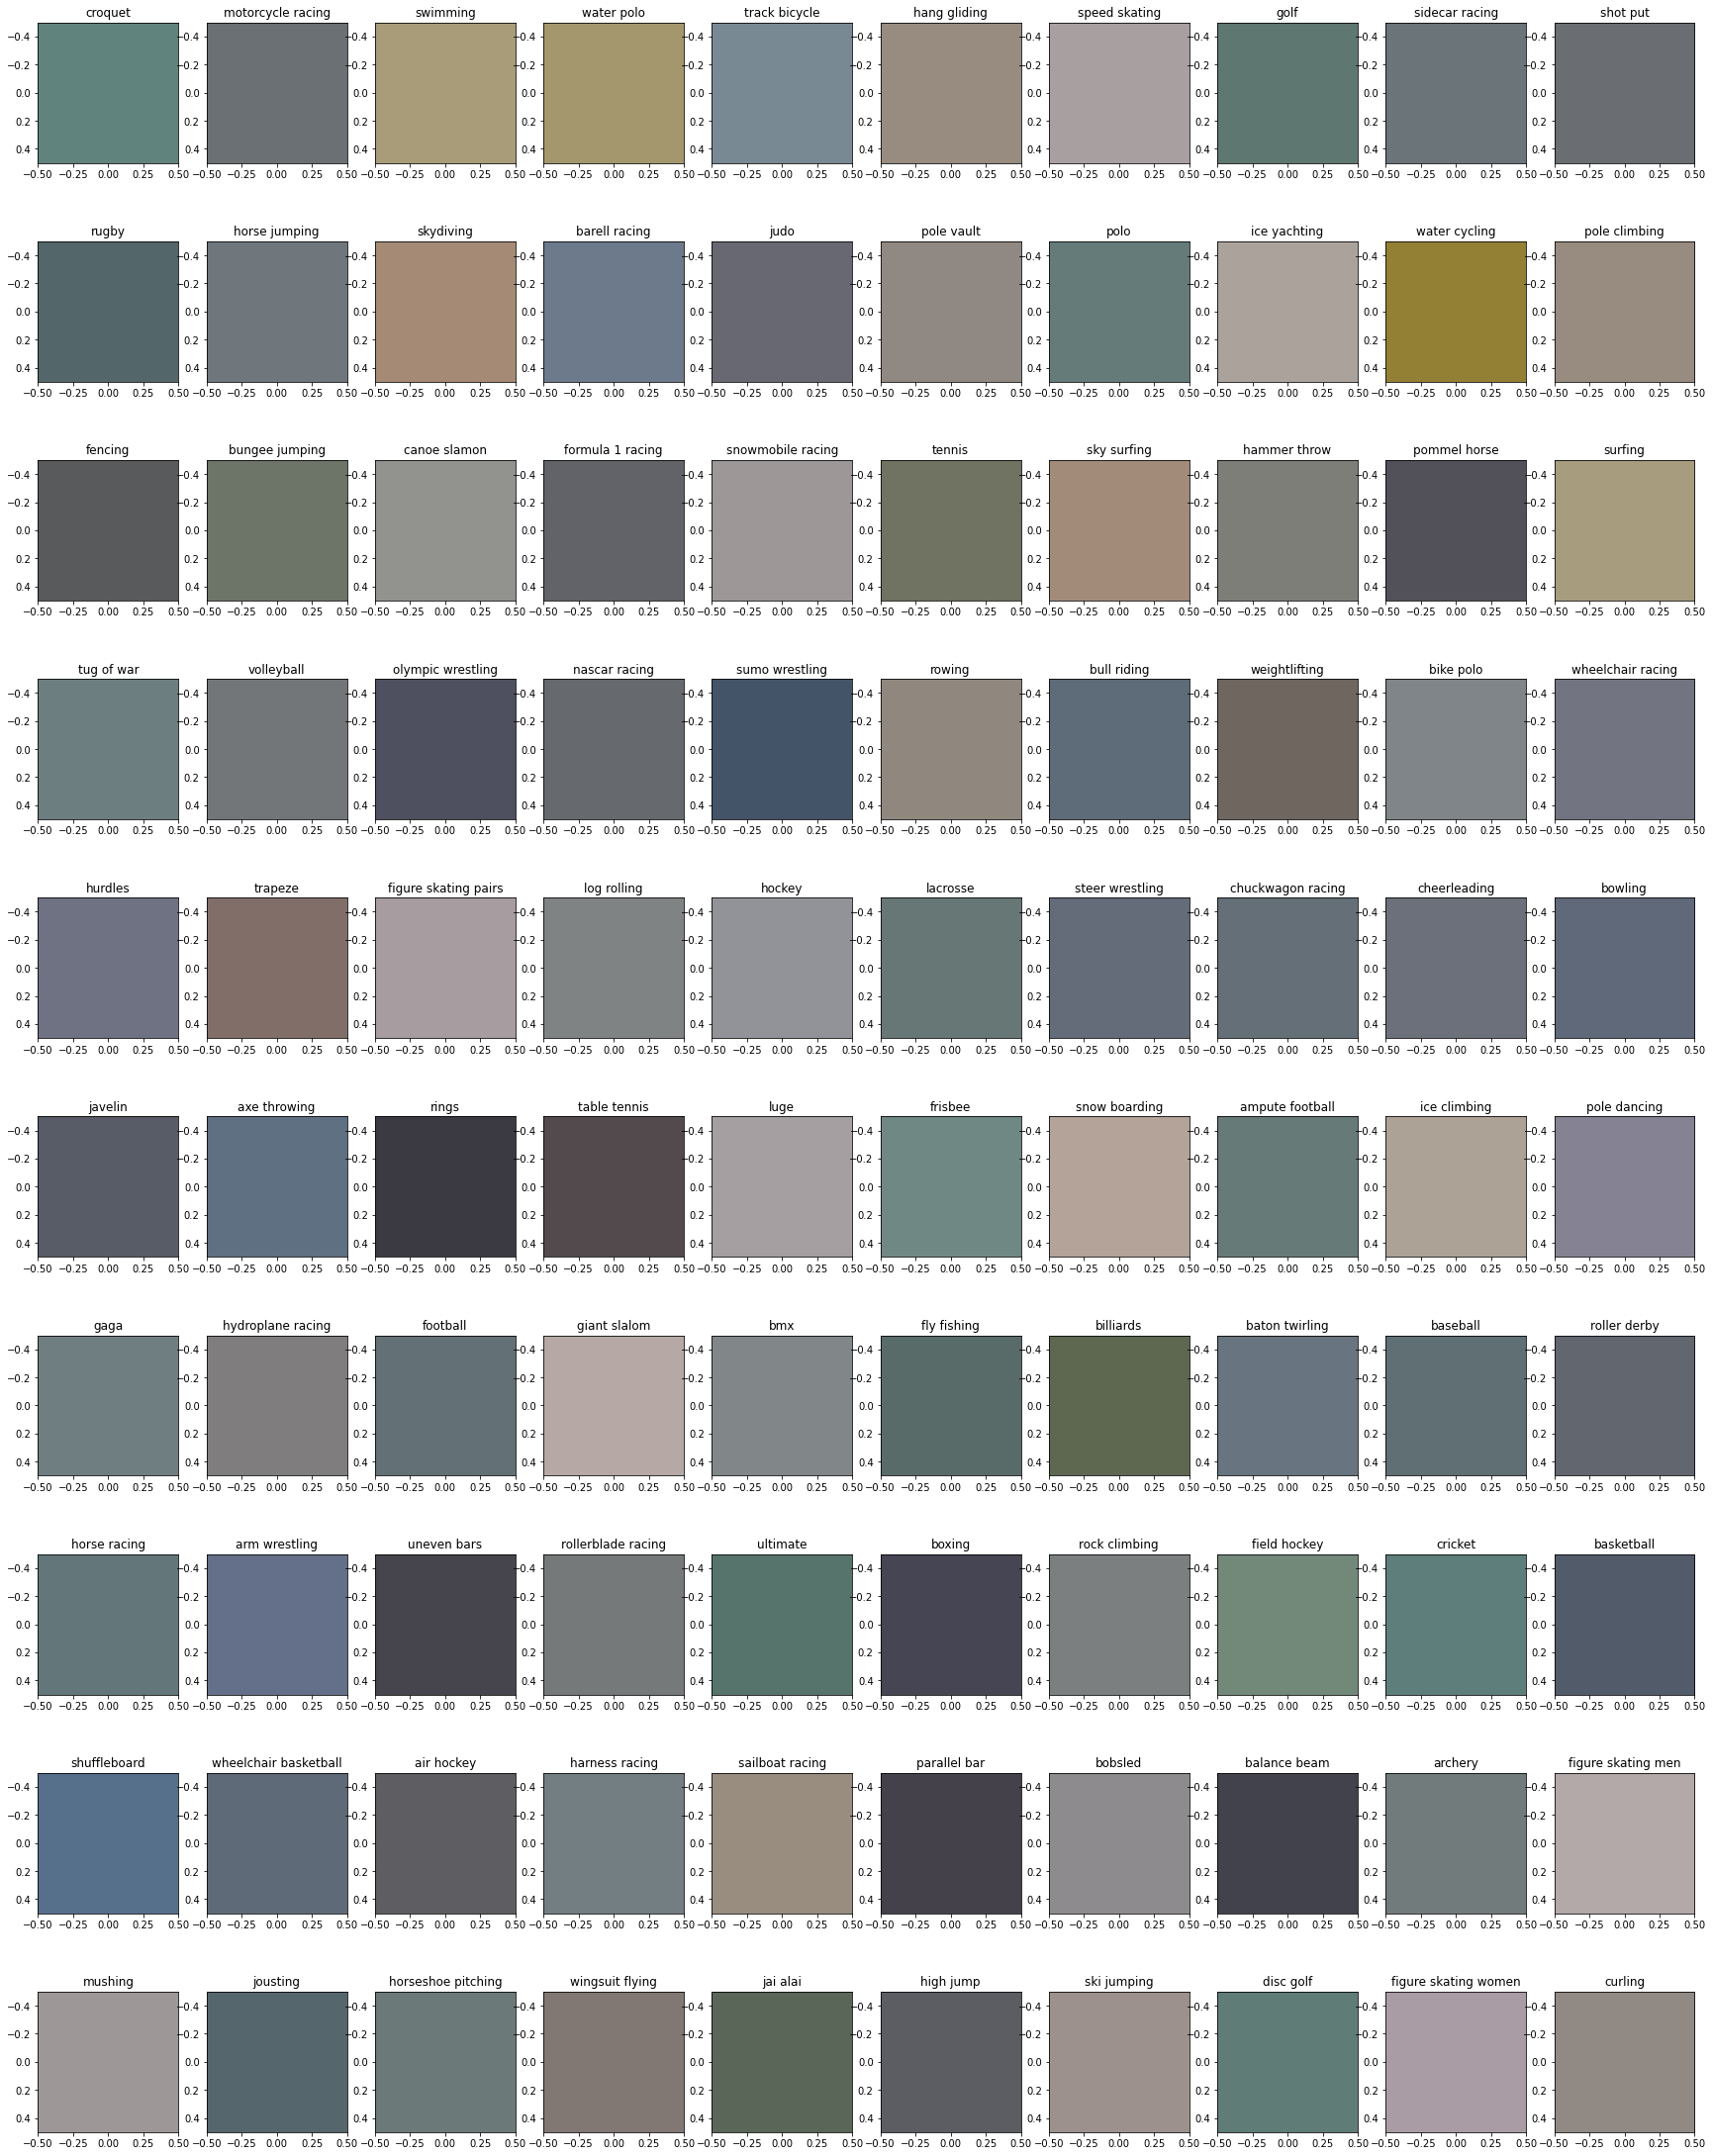

<Figure size 720x720 with 0 Axes>

In [16]:
import cv2
import numpy
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt

figure, axis = plt.subplots(nrows=10, ncols=10, figsize=(30,40))
j = 0
plt.figure(figsize = (10, 10))
for (i,dirpath) in enumerate(glob.iglob('/kaggle/working/imageclassificationsport/data/train/*')):
    filename = basename(dirpath)
    colors = []
    for imagepath in glob.iglob(dirpath+'/*'):
        myimg = cv2.imread(imagepath)
        colors.append(myimg)    
    averageIm = np.mean(colors, axis=0)
    averageColor = averageIm.mean(axis=(0,1))
    averageColor = numpy.round(averageColor,0)
    averageColor = [int(a) for a in averageColor]
    axis[i%10,j].imshow([[averageColor]])
    axis[i%10,j].set_title(filename)
    if ((i+1)%10 == 0):
        j+=1
    

Analyzujte triedy podľa predpovedí z ľubovoľného modelu natrénovaného na
probléme ImageNet

Správne vytvorte trénovaciu, validačnú a testovaciu množinu, pripravte si generátor dát (odporúčame aj augmentovať množinu), nezabudnite dáta normalizovať a vhodne im zmeniť veľkosť

In [17]:
import cv2

isExist = os.path.exists('/kaggle/working/compress/')
if not isExist:
    os.makedirs('/kaggle/working/compress/')
    
for dat in glob.iglob('/kaggle/working/imageclassificationsport/data/*'):
    dataname = basename(dat)
    isExist = os.path.exists('/kaggle/working/compress/'+dataname+'/')
    if not isExist:
        os.makedirs('/kaggle/working/compress/'+dataname+'/')
    #print(dataname)
    for path in glob.iglob(dat+'/*'):
        pathname = basename(path)
        isExist = os.path.exists('/kaggle/working/compress/'+dataname+'/'+pathname+"/")
        if not isExist:
            os.makedirs('/kaggle/working/compress/'+dataname+'/'+pathname+"/")
        #print(pathname)
        for imgpath in glob.iglob(path+'/*'):
            love = imgpath
            imgname = basename(imgpath)
            img = cv2.imread(imgpath, cv2.IMREAD_UNCHANGED)
            scale_percent = 20 # percent of original size
            width = int(img.shape[1] * scale_percent / 100)
            height = int(img.shape[0] * scale_percent / 100)
            dim = (width, height)
            resized = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)
            #plt.imshow(resized)
            cv2.imwrite("/kaggle/working/compress/"+dataname+"/"+pathname+"/"+imgname, resized)

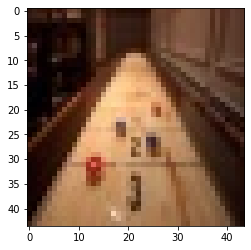

In [18]:
path = '/kaggle/working/compress/test/shuffleboard/5.jpg'
  
image = cv2.imread(path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)

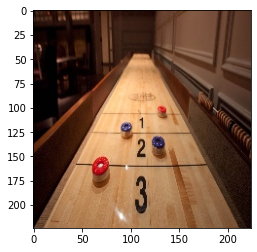

In [19]:
path = '/kaggle/working/imageclassificationsport/data/test/shuffleboard/5.jpg'
  
image = cv2.imread(path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)

In [20]:
import PIL
from PIL import Image

img = PIL.Image.open("/kaggle/working/compress/test/shuffleboard/5.jpg")
wid, hgt = img.size
print(wid,hgt)

44 44


In [21]:
for dat in glob.iglob('/kaggle/working/compress/test/*'):
    dataname = basename(dat)
    print(dataname)

croquet
rugby
fencing
tug of war
hurdles
javelin
gaga
horse racing
shuffleboard
mushing
motorcycle racing
horse jumping
bungee jumping
volleyball
trapeze
axe throwing
hydroplane racing
arm wrestling
wheelchair basketball
jousting
swimming
skydiving
canoe slamon
olympic wrestling
figure skating pairs
rings
football
uneven bars
air hockey
horseshoe pitching
water polo
barell racing
formula 1 racing
nascar racing
log rolling
table tennis
giant slalom
rollerblade racing
harness racing
wingsuit flying
track bicycle
judo
snowmobile racing
sumo wrestling
hockey
luge
bmx
ultimate
sailboat racing
jai alai
hang gliding
pole vault
tennis
rowing
lacrosse
frisbee
fly fishing
boxing
parallel bar
high jump
speed skating
polo
sky surfing
bull riding
steer wrestling
snow boarding
billiards
rock climbing
bobsled
ski jumping
golf
ice yachting
hammer throw
weightlifting
chuckwagon racing
ampute football
baton twirling
field hockey
balance beam
disc golf
sidecar racing
water cycling
pommel horse
bike polo


In [22]:
image_size = (wid, hgt)
batch_size = 64

train_ds= tf.keras.preprocessing.image_dataset_from_directory(
    "/kaggle/working/compress/train",
    seed=1337,
    image_size=image_size,
    batch_size=batch_size,
)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "/kaggle/working/compress/valid",
    seed=1337,
    image_size=image_size,
    batch_size=batch_size,
    shuffle=False,
)


test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "/kaggle/working/compress/test",
    seed=1337,
    image_size=image_size,
    batch_size=batch_size,
    shuffle=False,
)

Found 13572 files belonging to 100 classes.


2022-12-05 11:23:53.397025: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-05 11:23:53.400936: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-05 11:23:53.401648: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-05 11:23:53.403760: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

Found 500 files belonging to 100 classes.
Found 500 files belonging to 100 classes.


Zobrazte si reprezentanta z triedy

2022-12-05 11:23:56.312562: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


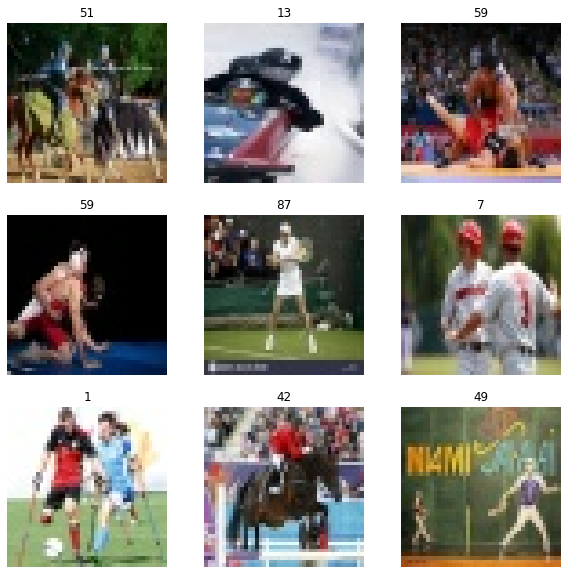

In [23]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(int(labels[i]))
        plt.axis("off")

In [24]:
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
    ]
)

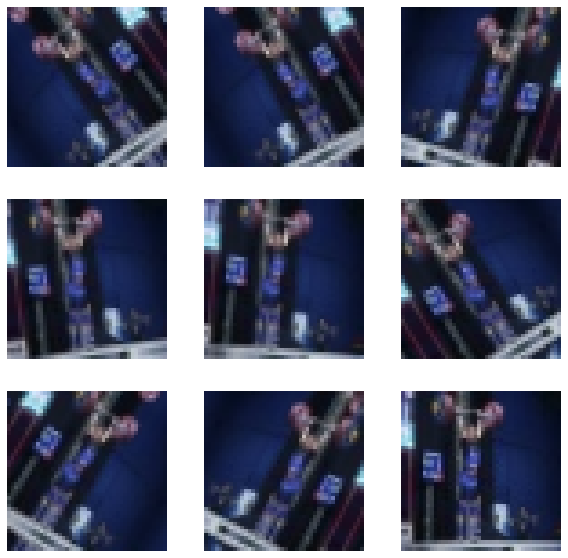

In [25]:
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis("off")

In [26]:
# Apply `data_augmentation` to the training images.
train_ds = train_ds.map(
    lambda img, label: (data_augmentation(img), label),
    num_parallel_calls=tf.data.AUTOTUNE,
)
# Prefetching samples in GPU memory helps maximize GPU utilization.
train_ds = train_ds.prefetch(tf.data.AUTOTUNE)
val_ds = val_ds.prefetch(tf.data.AUTOTUNE)

Navrhnite sieť s aspoň 2 konvolučnými vrstvami. Ak budete sledovať pretrenovanie,
riešte ho regularizáciou. Skúste niekoľko (cielených) konfigurácii hyperparametrov, výsledky zobrazte v tabuľke. Dopracujte sa aspoň ku viditeľnej diagonálena konfúznej matici.

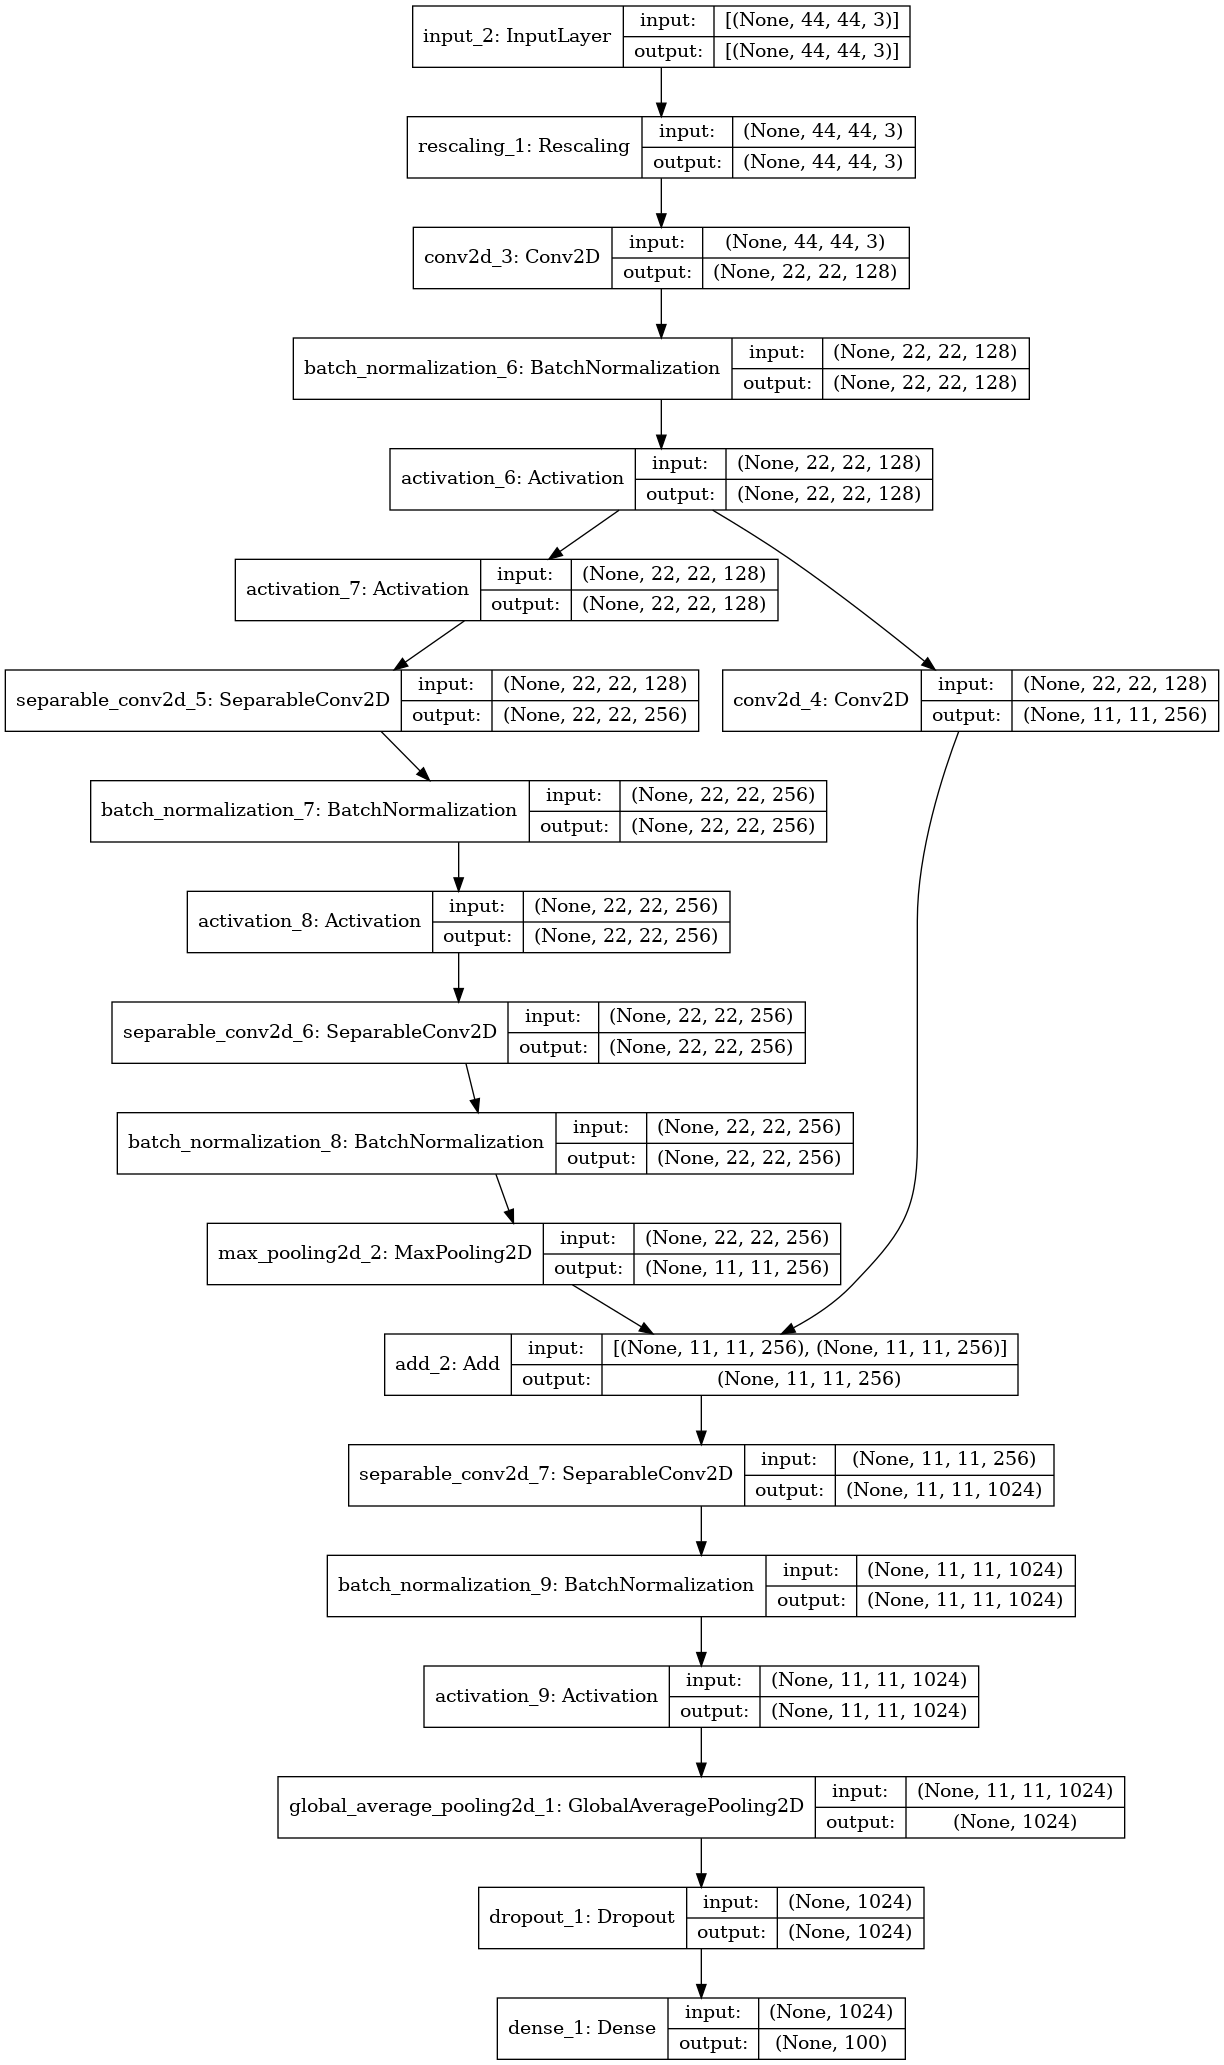

In [42]:
from tensorflow.keras.utils import plot_model

def make_model(input_shape, num_classes):
    inputs = keras.Input(shape=input_shape)

    # Entry block
    x = layers.Rescaling(1.0 / 255)(inputs)
    x = layers.Conv2D(128, 3, strides=2, padding="same")(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation("relu")(x)

    previous_block_activation = x  # Set aside residual

    for size in [256]:
        x = layers.Activation("relu")(x)
        x = layers.SeparableConv2D(size, 3, padding="same")(x)
        x = layers.BatchNormalization()(x)

        x = layers.Activation("relu")(x)
        x = layers.SeparableConv2D(size, 3, padding="same")(x)
        x = layers.BatchNormalization()(x)

        x = layers.MaxPooling2D(3, strides=2, padding="same")(x)

        # Project residual
        residual = layers.Conv2D(size, 1, strides=2, padding="same", kernel_regularizer =tf.keras.regularizers.l1( l=0.01))(
            previous_block_activation
        )
        x = layers.add([x, residual])  # Add back residual
        previous_block_activation = x  # Set aside next residual

    x = layers.SeparableConv2D(1024, 3, padding="same", kernel_regularizer =tf.keras.regularizers.l1( l=0.01))(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation("relu")(x)

    x = layers.GlobalAveragePooling2D()(x)
    if num_classes == 2:
        activation = "sigmoid"
        units = 1
    else:
        activation = "softmax"
        units = num_classes

    x = layers.Dropout(0.5)(x)
    outputs = layers.Dense(units, activation=activation)(x)
    return keras.Model(inputs, outputs)


model = make_model(input_shape=image_size + (3,), num_classes=100)
keras.utils.plot_model(model, show_shapes=True)
plot_model(model, to_file='/kaggle/working/model_plot.png', show_shapes=True, show_layer_names=True)

In [43]:
#import shutil
#shutil.rmtree('/kaggle/working/logs/')

In [44]:
rm -rf /kaggle/working/logs/

In [45]:
import matplotlib.pyplot as plt

def plot_confusion_matrix(cm, class_names):
  """
  Returns a matplotlib figure containing the plotted confusion matrix.

  Args:
    cm (array, shape = [n, n]): a confusion matrix of integer classes
    class_names (array, shape = [n]): String names of the integer classes
  """
  figure = plt.figure(figsize=(30, 30))
  plt.imshow(cm, interpolation='nearest', cmap='magma')
  plt.title("Confusion matrix")
  plt.colorbar()
  tick_marks = np.arange(len(class_names))
  plt.xticks(tick_marks, class_names,rotation=90)
  plt.yticks(tick_marks, class_names)

  # Compute the labels from the normalized confusion matrix.
  labels = np.around(cm.astype('float') / cm.sum(axis=1)[:, np.newaxis], decimals=2)

  # Use white text if squares are dark; otherwise black.
  threshold = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    color = "white" if cm[i, j] > threshold else "black"
    #plt.text(j, i, labels[i, j], horizontalalignment="center", color=color)

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  return figure

In [46]:
from datetime import datetime

# Clear out prior logging data.
#!rm -rf logs/image

logdir = "logs/image/" + datetime.now().strftime("%Y%m%d-%H%M%S")
# Define the basic TensorBoard callback.
tensorboard_callback = keras.callbacks.TensorBoard(log_dir=logdir)
file_writer_cm = tf.summary.create_file_writer(logdir + '/cm')

2022-12-05 11:34:22.773368: I tensorflow/core/profiler/lib/profiler_session.cc:131] Profiler session initializing.
2022-12-05 11:34:22.773423: I tensorflow/core/profiler/lib/profiler_session.cc:146] Profiler session started.
2022-12-05 11:34:23.251743: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session tear down.
2022-12-05 11:34:23.251952: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1748] CUPTI activity buffer flushed


In [47]:
def plot_to_image(figure):
  """Converts the matplotlib plot specified by 'figure' to a PNG image and
  returns it. The supplied figure is closed and inaccessible after this call."""
  # Save the plot to a PNG in memory.
  buf = io.BytesIO()
  plt.savefig(buf, format='png')
  # Closing the figure prevents it from being displayed directly inside
  # the notebook.
  plt.close(figure)
  buf.seek(0)
  # Convert PNG buffer to TF image
  image = tf.image.decode_png(buf.getvalue(), channels=4)
  # Add the batch dimension
  image = tf.expand_dims(image, 0)
  return image

In [48]:
import itertools
import io

def log_confusion_matrix(epoch, logs):
  # Use the model to predict the values from the validation dataset.
  test_pred_raw = model.predict(val_ds)
  test_pred = np.argmax(test_pred_raw, axis=1)
  test_labels = [labels for _, labels in val_ds.unbatch()]
  #test_labels = np.concatenate([y for x, y in val_ds], axis=0)

  # Calculate the confusion matrix.
  cm = sklearn.metrics.confusion_matrix(test_labels, test_pred)
  # Log the confusion matrix as an image summary.
  figure = plot_confusion_matrix(cm, class_names=class_names)
  cm_image = plot_to_image(figure)

  # Log the confusion matrix as an image summary.
  with file_writer_cm.as_default():
    tf.summary.image("Confusion Matrix", cm_image, step=epoch)

# Define the per-epoch callback.
cm_callback = keras.callbacks.LambdaCallback(on_epoch_end=log_confusion_matrix)

In [49]:
epochs = 40

callbacks = [
    keras.callbacks.EarlyStopping(monitor='val_loss', patience=5,verbose=1),
    keras.callbacks.ModelCheckpoint("best_model{epoch}.keras", monitor='val_loss',verbose=1, save_best_only=True, mode='min'),
    tf.keras.callbacks.TensorBoard(log_dir='/kaggle/working/logs'),
    cm_callback
]
model.compile(
    optimizer=keras.optimizers.Adam(1e-2),
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"],
)
history = model.fit(
    train_ds,
    epochs=epochs,
    callbacks=callbacks,
    validation_data=val_ds,
    use_multiprocessing=True
)

2022-12-05 11:34:23.417177: I tensorflow/core/profiler/lib/profiler_session.cc:131] Profiler session initializing.
2022-12-05 11:34:23.417222: I tensorflow/core/profiler/lib/profiler_session.cc:146] Profiler session started.
2022-12-05 11:34:23.700603: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session tear down.
2022-12-05 11:34:23.700788: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1748] CUPTI activity buffer flushed
/opt/conda/lib/python3.7/site-packages/keras/utils/generic_utils.py:497: CustomMaskWarning:

Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.



Epoch 1/40
  1/213 [..............................] - ETA: 3:00 - loss: 25.3948 - accuracy: 0.0000e+00

2022-12-05 11:34:24.834949: I tensorflow/core/profiler/lib/profiler_session.cc:131] Profiler session initializing.
2022-12-05 11:34:24.834991: I tensorflow/core/profiler/lib/profiler_session.cc:146] Profiler session started.


  2/213 [..............................] - ETA: 1:06 - loss: 25.0884 - accuracy: 0.0156    

2022-12-05 11:34:25.214226: I tensorflow/core/profiler/lib/profiler_session.cc:66] Profiler session collecting data.
2022-12-05 11:34:25.214910: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1748] CUPTI activity buffer flushed
2022-12-05 11:34:25.349935: I tensorflow/core/profiler/internal/gpu/cupti_collector.cc:673]  GpuTracer has collected 228 callback api events and 225 activity events. 
2022-12-05 11:34:25.357907: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session tear down.
2022-12-05 11:34:25.371781: I tensorflow/core/profiler/rpc/client/save_profile.cc:136] Creating directory: /kaggle/working/logs/train/plugins/profile/2022_12_05_11_34_25

2022-12-05 11:34:25.381497: I tensorflow/core/profiler/rpc/client/save_profile.cc:142] Dumped gzipped tool data for trace.json.gz to /kaggle/working/logs/train/plugins/profile/2022_12_05_11_34_25/4a143d02d23e.trace.json.gz
2022-12-05 11:34:25.395296: I tensorflow/core/profiler/rpc/client/save_profile.cc:136] Cre

213/213 [==============================] - 7s 27ms/step - loss: 5.5248 - accuracy: 0.0658 - val_loss: 4.6575 - val_accuracy: 0.0680

Epoch 00001: val_loss improved from inf to 4.65754, saving model to best_model1.keras


Cleanup called...


Epoch 2/40
213/213 [==============================] - 5s 23ms/step - loss: 4.0467 - accuracy: 0.1309 - val_loss: 4.2611 - val_accuracy: 0.1200

Epoch 00002: val_loss improved from 4.65754 to 4.26109, saving model to best_model2.keras


/opt/conda/lib/python3.7/site-packages/keras/utils/generic_utils.py:497: CustomMaskWarning:

Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.

Cleanup called...


Epoch 3/40
213/213 [==============================] - 5s 23ms/step - loss: 3.7176 - accuracy: 0.1871 - val_loss: 4.4371 - val_accuracy: 0.1740

Epoch 00003: val_loss did not improve from 4.26109


Cleanup called...


Epoch 4/40
213/213 [==============================] - 5s 23ms/step - loss: 3.4678 - accuracy: 0.2406 - val_loss: 3.8931 - val_accuracy: 0.2180

Epoch 00004: val_loss improved from 4.26109 to 3.89306, saving model to best_model4.keras


/opt/conda/lib/python3.7/site-packages/keras/utils/generic_utils.py:497: CustomMaskWarning:

Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.

Cleanup called...


Epoch 5/40
213/213 [==============================] - 5s 25ms/step - loss: 3.3131 - accuracy: 0.2700 - val_loss: 3.9782 - val_accuracy: 0.2680

Epoch 00005: val_loss did not improve from 3.89306


Cleanup called...


Epoch 6/40
213/213 [==============================] - 5s 24ms/step - loss: 3.1347 - accuracy: 0.3114 - val_loss: 3.1588 - val_accuracy: 0.3200

Epoch 00006: val_loss improved from 3.89306 to 3.15880, saving model to best_model6.keras


/opt/conda/lib/python3.7/site-packages/keras/utils/generic_utils.py:497: CustomMaskWarning:

Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.

Cleanup called...


Epoch 7/40
213/213 [==============================] - 6s 27ms/step - loss: 2.9705 - accuracy: 0.3495 - val_loss: 3.6037 - val_accuracy: 0.2860

Epoch 00007: val_loss did not improve from 3.15880


Cleanup called...


Epoch 8/40
213/213 [==============================] - 5s 23ms/step - loss: 2.8543 - accuracy: 0.3739 - val_loss: 3.6950 - val_accuracy: 0.2780

Epoch 00008: val_loss did not improve from 3.15880


Cleanup called...


Epoch 9/40
213/213 [==============================] - 5s 23ms/step - loss: 2.7842 - accuracy: 0.3985 - val_loss: 2.8916 - val_accuracy: 0.3940

Epoch 00009: val_loss improved from 3.15880 to 2.89162, saving model to best_model9.keras


/opt/conda/lib/python3.7/site-packages/keras/utils/generic_utils.py:497: CustomMaskWarning:

Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.

Cleanup called...


Epoch 10/40
213/213 [==============================] - 5s 23ms/step - loss: 2.6369 - accuracy: 0.4290 - val_loss: 3.8980 - val_accuracy: 0.3420

Epoch 00010: val_loss did not improve from 2.89162


Cleanup called...


Epoch 11/40
213/213 [==============================] - 5s 22ms/step - loss: 2.5579 - accuracy: 0.4473 - val_loss: 2.7031 - val_accuracy: 0.4340

Epoch 00011: val_loss improved from 2.89162 to 2.70306, saving model to best_model11.keras


/opt/conda/lib/python3.7/site-packages/keras/utils/generic_utils.py:497: CustomMaskWarning:

Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.

Cleanup called...


Epoch 12/40
213/213 [==============================] - 5s 24ms/step - loss: 2.4536 - accuracy: 0.4708 - val_loss: 2.9725 - val_accuracy: 0.4220

Epoch 00012: val_loss did not improve from 2.70306


Cleanup called...


Epoch 13/40
213/213 [==============================] - 5s 23ms/step - loss: 2.4035 - accuracy: 0.4863 - val_loss: 3.0239 - val_accuracy: 0.3800

Epoch 00013: val_loss did not improve from 2.70306


Cleanup called...


Epoch 14/40
213/213 [==============================] - 6s 26ms/step - loss: 2.3435 - accuracy: 0.5009 - val_loss: 2.7406 - val_accuracy: 0.4820

Epoch 00014: val_loss did not improve from 2.70306


Cleanup called...


Epoch 15/40
213/213 [==============================] - 5s 23ms/step - loss: 2.2802 - accuracy: 0.5181 - val_loss: 3.0330 - val_accuracy: 0.4340

Epoch 00015: val_loss did not improve from 2.70306


Cleanup called...


Epoch 16/40
213/213 [==============================] - 5s 22ms/step - loss: 2.2415 - accuracy: 0.5289 - val_loss: 2.9677 - val_accuracy: 0.4180

Epoch 00016: val_loss did not improve from 2.70306


Cleanup called...


Epoch 00016: early stopping


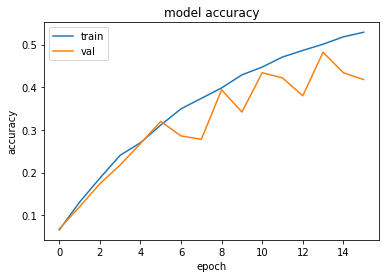

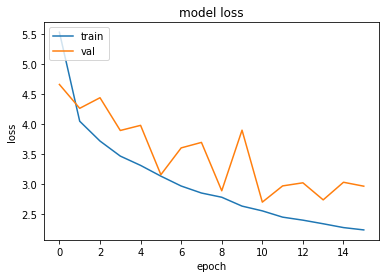

In [50]:
import matplotlib.pyplot as plt
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [51]:
import tensorflow as tf

%load_ext tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [52]:
import os

# folder path
dir_path = '/kaggle/working/logs/'

# list to store files
res = []

# Iterate directory
for path in os.listdir(dir_path):
    print(path)

train
validation
image


In [53]:
#tensorboard --logdir /kaggle/working/logs/train --bind_all

In [54]:
!zip -r file.zip /kaggle/working/logs

updating: kaggle/working/logs/ (stored 0%)
updating: kaggle/working/logs/train/ (stored 0%)
updating: kaggle/working/logs/train/plugins/ (stored 0%)
updating: kaggle/working/logs/train/plugins/profile/ (stored 0%)
updating: kaggle/working/logs/validation/ (stored 0%)
updating: kaggle/working/logs/image/ (stored 0%)
  adding: kaggle/working/logs/train/plugins/profile/2022_12_05_11_34_25/ (stored 0%)
  adding: kaggle/working/logs/train/plugins/profile/2022_12_05_11_34_25/4a143d02d23e.xplane.pb (deflated 75%)
  adding: kaggle/working/logs/train/plugins/profile/2022_12_05_11_34_25/4a143d02d23e.memory_profile.json.gz (stored 0%)
  adding: kaggle/working/logs/train/plugins/profile/2022_12_05_11_34_25/4a143d02d23e.tensorflow_stats.pb (deflated 68%)
  adding: kaggle/working/logs/train/plugins/profile/2022_12_05_11_34_25/4a143d02d23e.trace.json.gz (deflated 0%)
  adding: kaggle/working/logs/train/plugins/profile/2022_12_05_11_34_25/4a143d02d23e.input_pipeline.pb (deflated 58%)
  adding: kaggle/

In [55]:
from IPython.display import FileLink
FileLink(r'file.zip')

/kaggle/working/file.zip

In [56]:
 import plotly.express as px
    
predicted_classes = np.array([])
true_classes =  np.array([])
    
test_pred_raw = model.predict(test_ds)
test_pred = np.argmax(test_pred_raw, axis=1)
test_labels = np.concatenate([y for x, y in test_ds], axis=0)
#test_labels = [labels for _, labels in test_ds.unbatch()]

# Calculate the confusion matrix.
cm = sklearn.metrics.confusion_matrix(test_labels, test_pred)
# Log the confusion matrix as an image summary.


fig = px.imshow(cm,width=600, height=600,x=class_names,y=class_names)
fig.show()